# Load essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

2023-07-16 18:06:41.647579: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-16 18:06:41.649847: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 18:06:41.690294: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 18:06:41.691325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-16 18:06:42.328464: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# Read the dataset

In [3]:
df = pd.read_csv("ecg.csv", header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


# Let’s perform the following data manipulations:

# 1. Split data and labels

In [5]:
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

In [6]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

# 2. Split train and test data with test_size = 0.2

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

# 3. Normalization

In [8]:
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

In [9]:
min

<tf.Tensor: shape=(), dtype=float64, numpy=-6.2808752>

In [10]:
max

<tf.Tensor: shape=(), dtype=float64, numpy=7.4021031>

In [11]:
train_data = (train_data-min)/(max-min)
test_data = (test_data-min)/(max-min)

In [12]:
train_data

<tf.Tensor: shape=(3998, 140), dtype=float64, numpy=
array([[0.57030466, 0.46561659, 0.29058117, ..., 0.48504233, 0.42335019,
        0.47598344],
       [0.48320587, 0.28246963, 0.16471254, ..., 0.56756701, 0.46772939,
        0.26923291],
       [0.48144641, 0.35151403, 0.25972766, ..., 0.54794209, 0.50775438,
        0.54298664],
       ...,
       [0.41039048, 0.24164985, 0.13120877, ..., 0.52773129, 0.56540911,
        0.50238847],
       [0.53977477, 0.41407858, 0.28101392, ..., 0.51266516, 0.43706054,
        0.44268649],
       [0.29639772, 0.15988175, 0.18883787, ..., 0.53766964, 0.54578602,
        0.40826709]])>

In [13]:
test_data

<tf.Tensor: shape=(1000, 140), dtype=float64, numpy=
array([[0.48035769, 0.28877791, 0.19828546, ..., 0.45463307, 0.52461251,
        0.3713729 ],
       [0.36878969, 0.30728118, 0.26587983, ..., 0.58551235, 0.56629881,
        0.57264043],
       [0.45354808, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.52847338,
        0.49527123],
       ...,
       [0.48304973, 0.36122933, 0.27729513, ..., 0.32799057, 0.3158066 ,
        0.26930442],
       [0.4090865 , 0.27907098, 0.22604261, ..., 0.39099607, 0.45987614,
        0.42140076],
       [0.42648116, 0.17669384, 0.14546009, ..., 0.47333889, 0.55036914,
        0.37805187]])>

# 4. Data format conversion

In [14]:
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

In [15]:
test_data

<tf.Tensor: shape=(1000, 140), dtype=float32, numpy=
array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
        0.3713729 ],
       [0.3687897 , 0.30728117, 0.26587984, ..., 0.58551234, 0.5662988 ,
        0.5726404 ],
       [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
        0.49527124],
       ...,
       [0.48304972, 0.36122933, 0.27729514, ..., 0.32799056, 0.3158066 ,
        0.26930442],
       [0.4090865 , 0.27907097, 0.22604261, ..., 0.39099607, 0.45987615,
        0.42140076],
       [0.42648116, 0.17669384, 0.14546008, ..., 0.4733389 , 0.55036914,
        0.37805188]], dtype=float32)>

The dtype parameter in TensorFlow (and many other numerical computing libraries) is used to specify the data type of the elements in a tensor. The two data types you mentioned, float64 and float32, represent different precision levels for floating-point numbers.

float64 (also known as tf.float64 in TensorFlow) represents a 64-bit floating-point number. It provides higher precision and can represent decimal values with greater accuracy. It uses 64 bits of memory to store each element.

float32 (also known as tf.float32 in TensorFlow) represents a 32-bit floating-point number. It provides slightly lower precision compared to float64, but it uses less memory. It uses 32 bits of memory to store each element.

In general, float64 is used when high precision is required, such as in scientific computations or when dealing with very large or small numbers. However, it comes with the cost of increased memory usage. On the other hand, float32 is commonly used in most deep learning models, as it provides sufficient precision for most applications while being more memory-efficient.

The choice of data type depends on the specific requirements of your task. If memory usage is a concern, or if the dataset is large, float32 can be a suitable choice. However, if you need higher precision or are working with numerical algorithms that benefit from increased precision, float64 may be necessary.

# 5. Label format conversion

In [16]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [17]:
train_labels

array([ True,  True,  True, ...,  True,  True,  True])

In [18]:
test_labels

array([ True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,

# 6. Separate normal and abnormal ECG data

# A. Normal ECG data

In [19]:
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

In [20]:
n_train_data

<tf.Tensor: shape=(2359, 140), dtype=float32, numpy=
array([[0.57030463, 0.46561658, 0.29058117, ..., 0.48504233, 0.4233502 ,
        0.47598344],
       [0.48320588, 0.28246963, 0.16471253, ..., 0.567567  , 0.4677294 ,
        0.2692329 ],
       [0.48144642, 0.35151404, 0.25972766, ..., 0.5479421 , 0.5077544 ,
        0.54298663],
       ...,
       [0.41039047, 0.24164985, 0.13120876, ..., 0.5277313 , 0.5654091 ,
        0.5023885 ],
       [0.5397748 , 0.4140786 , 0.28101394, ..., 0.51266515, 0.43706053,
        0.4426865 ],
       [0.29639772, 0.15988176, 0.18883787, ..., 0.53766966, 0.545786  ,
        0.40826708]], dtype=float32)>

In [21]:
n_test_data

<tf.Tensor: shape=(560, 140), dtype=float32, numpy=
array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
        0.3713729 ],
       [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
        0.49527124],
       [0.4521779 , 0.25685105, 0.12592098, ..., 0.55448556, 0.5861353 ,
        0.4754273 ],
       ...,
       [0.48304972, 0.36122933, 0.27729514, ..., 0.32799056, 0.3158066 ,
        0.26930442],
       [0.4090865 , 0.27907097, 0.22604261, ..., 0.39099607, 0.45987615,
        0.42140076],
       [0.42648116, 0.17669384, 0.14546008, ..., 0.4733389 , 0.55036914,
        0.37805188]], dtype=float32)>

# B. Abnormal ECG data

In [22]:
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

In [23]:
an_test_data

<tf.Tensor: shape=(440, 140), dtype=float32, numpy=
array([[0.3687897 , 0.30728117, 0.26587984, ..., 0.58551234, 0.5662988 ,
        0.5726404 ],
       [0.45878157, 0.43861866, 0.44218123, ..., 0.29617104, 0.32473418,
        0.43136704],
       [0.344323  , 0.31411245, 0.32462206, ..., 0.3313962 , 0.3809925 ,
        0.45533565],
       ...,
       [0.3493378 , 0.28614876, 0.29047537, ..., 0.31901175, 0.34637472,
        0.45208865],
       [0.5713978 , 0.5637761 , 0.5245046 , ..., 0.12886006, 0.18022895,
        0.26692218],
       [0.4697181 , 0.4619233 , 0.461555  , ..., 0.5800685 , 0.5970339 ,
        0.60342324]], dtype=float32)>

In [24]:
an_train_data

<tf.Tensor: shape=(1639, 140), dtype=float32, numpy=
array([[0.4304001 , 0.35345322, 0.30342638, ..., 0.30506894, 0.262255  ,
        0.2502011 ],
       [0.4494794 , 0.37906834, 0.3202905 , ..., 0.31546655, 0.39611116,
        0.46317974],
       [0.49198422, 0.4355403 , 0.3698029 , ..., 0.5260356 , 0.52524984,
        0.5278486 ],
       ...,
       [0.43457043, 0.362154  , 0.34958026, ..., 0.3179064 , 0.3426891 ,
        0.49215436],
       [0.4814947 , 0.4255184 , 0.38368973, ..., 0.29031053, 0.3311408 ,
        0.4467481 ],
       [0.4276824 , 0.3507402 , 0.31587753, ..., 0.3177887 , 0.33242297,
        0.419218  ]], dtype=float32)>

# Lets plot a normal ECG

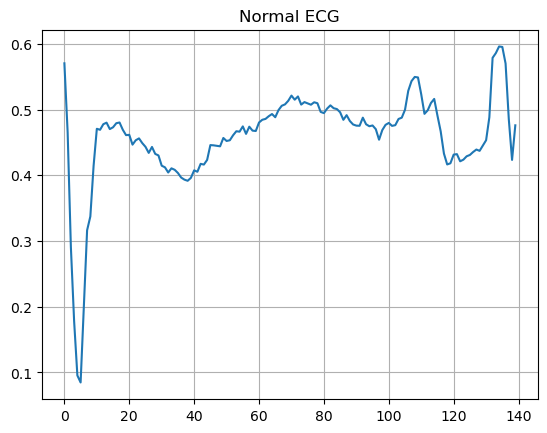

In [25]:
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal ECG')
plt.show()

# Lets plot an abnormal ECG

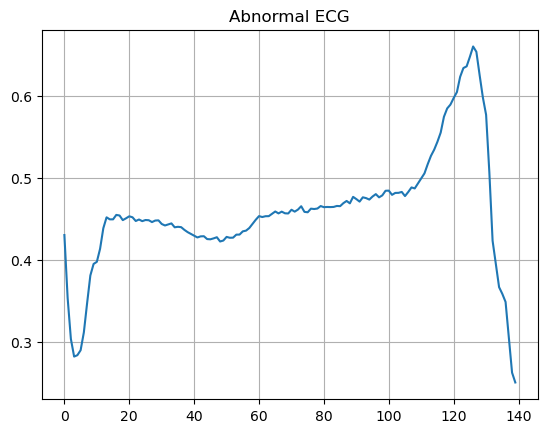

In [26]:
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

# Let’s introduce the detector = encoder + decoder class

In [ ]:
#class detector(Model):
#    def init(self):
#        super(detector, self).init()
#        self.encoder = tf.keras.Sequential([
#        layers.Dense(32, activation='relu'),
#        layers.Dense(16, activation='relu'),
#        layers.Dense(8, activation='relu')
#        ])
#        self.decoder = tf.keras.Sequential([
#        layers.Dense(16, activation='relu'),
#        layers.Dense(32, activation='relu'),
#        layers.Dense(140, activation='sigmoid')
#        ])
#    
#        def call(self, x):
#            encoded = self.encoder(x)
#            decoded = self.decoder(encoded)
#            return decoded


Above code does not run, gives error, so below code taken from kaggle works fine

In [27]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

# Let’s compile and train the model

In [28]:
#autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')

In [29]:
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

Epoch 1/20
5/5 [==============================] - 1s 48ms/step - loss: 0.0576 - val_loss: 0.0562
Epoch 2/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0553 - val_loss: 0.0535
Epoch 3/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0523 - val_loss: 0.0499
Epoch 4/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0486 - val_loss: 0.0460
Epoch 5/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0446 - val_loss: 0.0419
Epoch 6/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0406 - val_loss: 0.0381
Epoch 7/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0370 - val_loss: 0.0349
Epoch 8/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0339 - val_loss: 0.0321
Epoch 9/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0314 - val_loss: 0.0299
Epoch 10/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0295 - val_loss: 0.0284
Epoch 11/20
5/5 [============

# Let’s define a function in order to plot the original ECG and reconstructed ones and also show the error

In [32]:
def plot(data, n):
    enc_img = autoencoder.encoder(data)
    dec_img = autoencoder.decoder(enc_img)
    plt.plot(data[n], 'b')
    plt.plot(dec_img[n], 'r')
    plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
    plt.legend(labels=['Input', 'Reconstruction', 'Error'])
    plt.show()

# Let’s plot the normal ECG

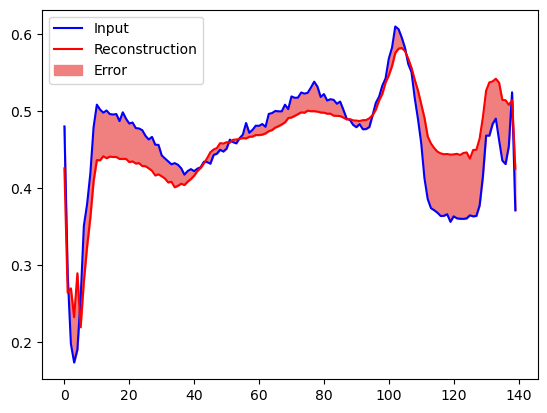

In [33]:
plot(n_test_data, 0)

# Let’s plot the abnormal ECG

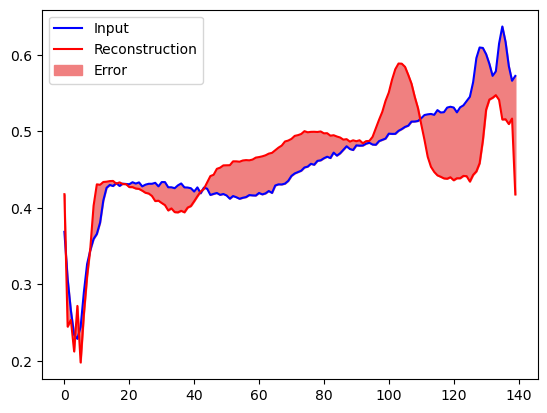

In [34]:
plot(an_test_data, 0)

# Let’s apply autoencoder to n_train_data

In [35]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)
t = np.mean(train_loss) + np.std(train_loss)

In [36]:
def prediction(model, data, threshold):
    rec = model(data)
    loss = losses.mae(rec, data)
    return tf.math.less(loss, threshold)
    print(t)

In [37]:
print(t)

0.033645935


# Let’s apply autoencoder prediction to n_test_data with t=0.034331195

In [38]:
pred = prediction(autoencoder, n_test_data, t)

In [39]:
pred

<tf.Tensor: shape=(560,), dtype=bool, numpy=
array([False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  Tr

# Let’s look at a few selected ECG curves

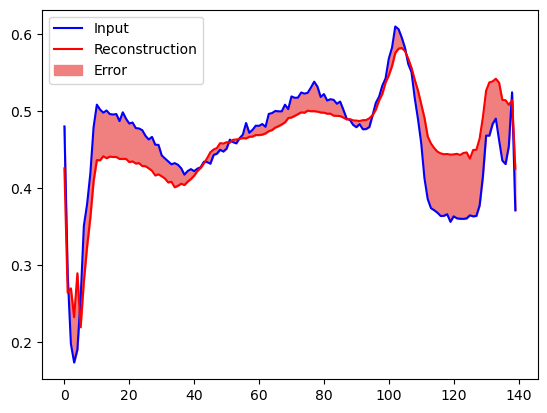

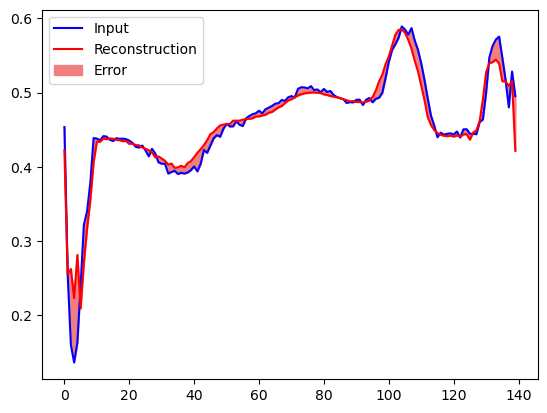

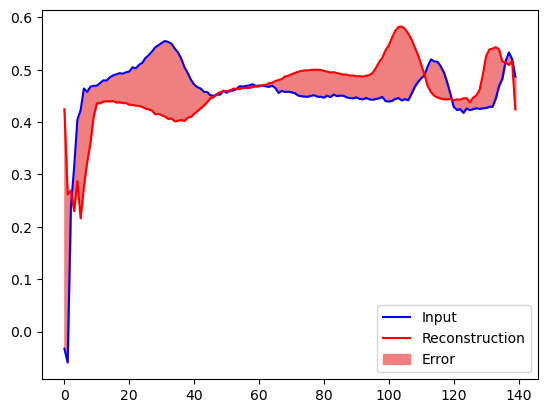

In [40]:
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 3)